# Regressão 01 - tarefa 01

In [2]:
# importanto as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from seaborn import load_dataset

%matplotlib inline

In [3]:
def dispersion_graph(x: pd.Series, y: pd.Series) -> None:

    
    # criando o gráfico de dispersão
    sns.regplot(data=tips, x=x, y=y, color='g')

    # adicionando a linha dos 10%
    x = np.linspace(0, tips['net_bill'].max(), 100)
    y = 0.1 * x
    
    plt.plot(x, y, '-r', label='10%')

    plt.legend()
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [4]:
# carrega a base de dados

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


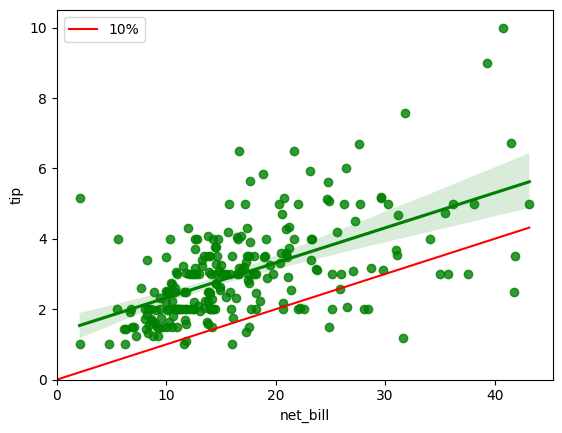

In [5]:
dispersion_graph(x='net_bill', y='tip')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.52e-06
Time:                        19:50:00   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

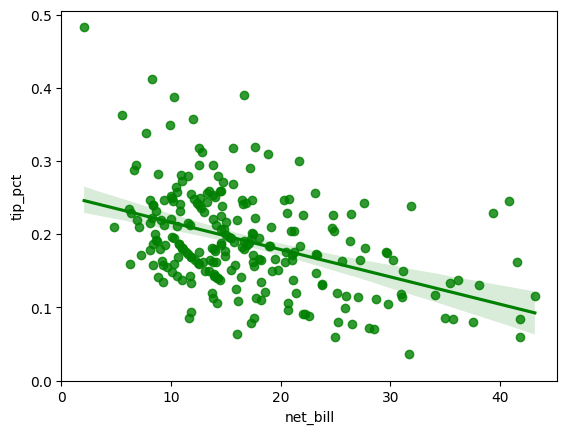

In [7]:
# criando o gráfico de dispersão
# será utilizado tips_pct menor ou igual a 0.7
sns.regplot(data=tips[tips['tip_pct']<=0.7], x='net_bill', y='tip_pct', color='g')

# adicionando a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x

plt.xlim(0)
plt.ylim(0)
plt.show()

In [8]:
reg.params

Intercept    0.305297
net_bill    -0.006146
dtype: float64

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Utilizando a variável 'tip_pct' os dados não ficam bem explicados. A porcentagem da gorjeta é uma grandeza que, em tese, não explicaria o valor de uma conta, já que, é possível variar o valor da gorjeta independemente do valor original da conta. Os R² podem ser comparados, considerando que estamos no mesmo grupo de dados. E, o R² usando 'tip_pct' é muito pequeno.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [9]:
tips['tip_pct_pred'] = reg.predict(tips)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358


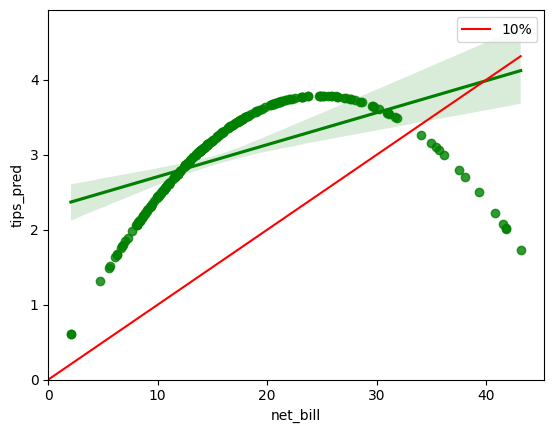

In [10]:
tips['tips_pred'] = tips['tip_pct_pred']*tips['net_bill']
dispersion_graph(x='net_bill', y='tips_pred')

Aqui é previso que a gorjeta terá um valor máximo para um dado valor de conta, e depois cairá. O comportamento se assemelha a uma parabola.

Comparando o R² para o novo modelo.

In [11]:
reg = smf.ols('tips_pred ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tips_pred   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           6.88e-20
Time:                        19:50:02   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² do item 1 é: 0.333

Do novo modelo tips_pred: 0.292